# Projeto Ciência de dados - Previsão de vendas

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritimos(Aqui entra a IA, se necessário)
- Passo 7: Interpretação de Resultados

- RADIO, JORNAL, TV estão em milhares de reais e as VENDAS estão em milhões

In [6]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
#Importar base de dados
import pandas as pd

tabela = pd.read_csv(r"C:\Users\KAIRA\Downloads\advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Passo 5: Análise Exploratória
    #- calcular a correlação(quão caminhando na mesma direção estão as coisas(proporcionalidade))
print(tabela.corr())

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


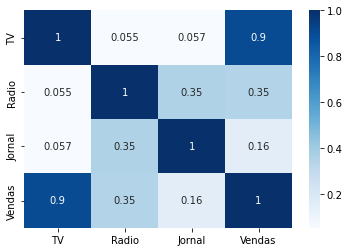

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#criar um grafico
sns.heatmap(tabela.corr(),cmap="Blues",annot=True)
#exibir o grafico
plt.show()

In [17]:
#- Passo 6: Modelagem + Algoritimos(Aqui entra a IA, se necessário)
    # Separando em dados de treino e dados de teste
y = tabela["Vendas"]
x = tabela[["TV","Jornal","Radio"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

Inteligengias:
    - Regressão linear
    - RandomForest(Árvore de Decisão)

In [18]:
# importar a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligencia
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligencia
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

Teste da IA e avaliação do melhor modelo

In [20]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.8825603189581182
0.9268141072327524


Visualização gráfica das previsões

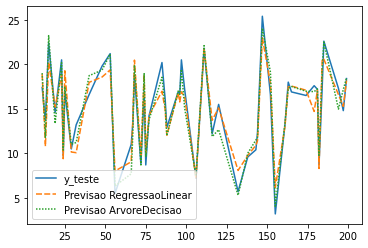

In [24]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao RegressaoLinear"] = previsao_regressaolinear
tabela_auxiliar["Previsao ArvoreDecisao"] = previsao_arvoredecisao

sns.lineplot(data=tabela_auxiliar)
plt.show()

Como fazer uma nova previsão?

In [25]:
nova_tabela =pd.read_csv(r"C:\Users\KAIRA\Downloads\novos.csv")

display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [29]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 8.89   8.612 16.365]
